In [76]:
from openbb import obb
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline

In [77]:
# Get the price of a stock
quote_data = obb.equity.price.quote(symbol="AAPL", provider="yfinance")
quote_data

OBBject[T]

id: 068c5055-73dc-7d81-8000-e7952116f746
results: [{'symbol': 'AAPL', 'asset_type': 'EQUITY', 'name': 'Apple Inc.', 'exchang...
provider: yfinance
warnings: None
chart: None
extra: {'metadata': {'arguments': {'provider_choices': {'provider': 'yfinance'}, 's...

In [78]:
quote_data.to_df()

,symbol,asset_type,name,exchange,bid,bid_size,ask,ask_size,last_price,open,...,low,volume,prev_close,year_high,year_low,ma_50d,ma_200d,volume_average,volume_average_10d,currency
0,AAPL,EQUITY,Apple Inc.,NMS,233.69,4,234.13,4,234.07,229.27,...,229.02,55220889,230.03,260.1,169.21,221.1258,221.5177,54920432.0,55708090.0,USD


In [79]:
obb.equity.price.historical(symbol="AAPL", provider="yfinance").to_df().info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 2024-09-13 to 2025-09-12
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      250 non-null    float64
 1   high      250 non-null    float64
 2   low       250 non-null    float64
 3   close     250 non-null    float64
 4   volume    250 non-null    int64  
 5   dividend  250 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [80]:
sp500_tickers = list(pd.read_csv("https://raw.githubusercontent.com/datasets/s-and-p-500-companies/refs/heads/main/data/constituents.csv", usecols=["Symbol"]).squeeze())
sp500_tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',


## Data download loop for S&P 500 stocks

In [81]:
# df_sp500 = pd.DataFrame()
# for i, ticker in enumerate(sp500_tickers):
#     print(f"Fetching data for {ticker} ({i+1}/{len(sp500_tickers)})")
#     try:
#         df_ticker = obb.equity.price.historical(symbol=ticker, provider="yfinance").to_df()
#         df_ticker["ticker"] = ticker
#         if df_sp500.empty:
#             df_sp500 = df_ticker
#         else:
#             df_sp500 = pd.concat([df_sp500, df_ticker])
#     except Exception as e:
#         print(f"Could not fetch data for {ticker}: {e}")
#
# df_sp500.to_csv("sp500_data.csv")


In [82]:
df_sp500 = pd.read_csv("sp500_data.csv", parse_dates=["date"], index_col=["date", "ticker"]).sort_index()
df_sp500_close = df_sp500.unstack()["close"]

<Axes: xlabel='ticker', ylabel='ticker'>

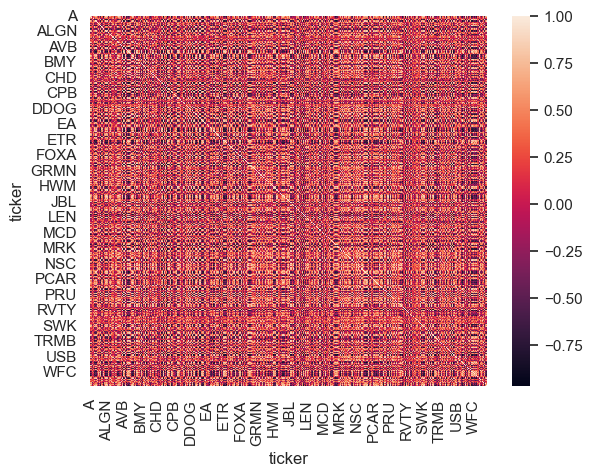

In [83]:
sns.set_theme(style="white")
df_sp500_close_corr = df_sp500_close.corr()
sns.heatmap(df_sp500_close_corr)

date
2024-09-12    136.389999
2024-09-13    137.309998
2024-09-16    138.309998
2024-09-17    138.350006
2024-09-18    139.009995
                 ...    
2025-09-05    128.750000
2025-09-08    128.130005
2025-09-09    126.250000
2025-09-10    124.120003
2025-09-11    126.730003
Name: A, Length: 250, dtype: float64